## Data

In [2]:
import matplotlib.pyplot as plt

from model.dataset import FreiHANDDataset, FreiHANDDataLoader

test_dataset = FreiHANDDataset(set_type="test")
test_dataset

FreiHAND [Test - 1560 items]

In [3]:
test_dataloader = FreiHANDDataLoader(
    dataset=test_dataset,
    batch_size=4,
    shuffle=True,
    drop_last=False,
    num_workers=2,
)
test_dataloader

FreiHANDDataLoader [Test - Batch size: 4 - Length: 390]

## Model

In [6]:
from io_ import get_model_file
import torch
from model.network import ShallowUNet
from settings import DEVICE

model = ShallowUNet(in_channel=3, out_channel=21)
model

ShallowUNet(
  (conv_down1): ConvBlock(
    (double_conv): Sequential(
      (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): ReLU(inplace=True)
      (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): ReLU(inplace=True)
    )
  )
  (conv_down2): ConvBlock(
    (double_conv): Sequential(
      (0): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): ReLU(inplace=True)
      (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (5): ReLU(inplace=True)
    )
  )
  (conv_down3

In [9]:
model.load_state_dict(
    torch.load(get_model_file(), map_location=torch.device(DEVICE))
)

<All keys matched successfully>


## Evaluate on Test Data

In [34]:
for batch_data in test_dataloader:
    break

In [92]:
ids = batch_data["image_name"]
ids[3]

'00031379.jpg'

In [49]:
from model.hand import HandCollection
collector = HandCollection()

In [93]:
item = test_dataset.__getitem__(idx=379)

In [94]:
item["image_name"]

'00031379.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


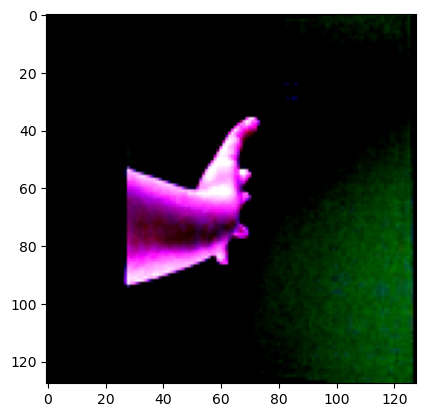

In [95]:
import matplotlib.pyplot as plt
plt.imshow(item["image"].permute(1, 2, 0))

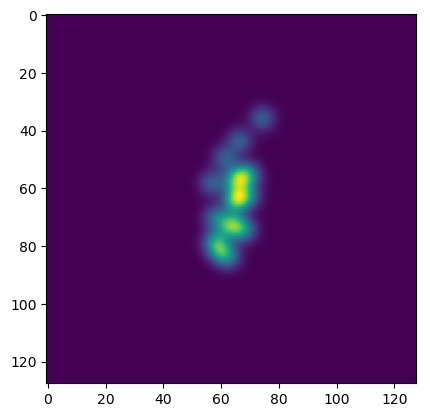

In [96]:
plt.imshow(torch.sum(item["heatmaps"], dim=0))

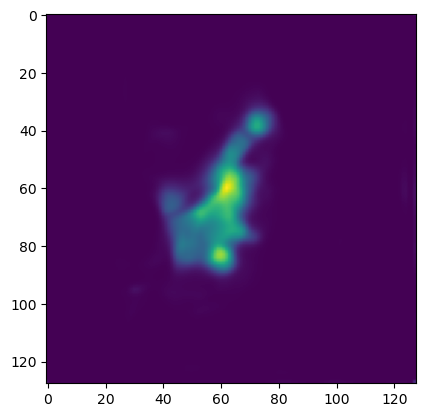

In [98]:
plt.imshow(torch.sum(pred_heatmaps[3], dim=0).detach().numpy())